In [57]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [58]:
#Check the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [59]:
#Copy the data to not overrite the original
data = titanic.copy()

#By looking at the categories, I would remove "Embark Town".
#It should have no influence on chances of survival.
data.drop(columns='embark_town',inplace=True)
#We will need change object-type columns to number-caregorical ones
categorical_columns = list(data.select_dtypes(include='object').columns)
#numeric columns will be all changed to float
numeric_columns = [i for i in data.columns if i not in categorical_columns]
data[numeric_columns] = data[numeric_columns].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    float64
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    float64
 4   parch               627 non-null    float64
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(5), object(4)
memory usage: 44.2+ KB


In [60]:
#We change object columns to categorical ones:
for col in categorical_columns:
    unlist = {n:i for i,n in enumerate(data[col].unique())}
    data[col] = data[col].apply(lambda x: float(unlist[x]))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    float64
 1   sex                 627 non-null    float64
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    float64
 4   parch               627 non-null    float64
 5   fare                627 non-null    float64
 6   class               627 non-null    float64
 7   deck                627 non-null    float64
 8   alone               627 non-null    float64
dtypes: float64(9)
memory usage: 44.2 KB


In [ ]:
#Split labels from features.
labels = data.pop('survived')

In [144]:
#build the model
def titanic_model():
    model = tf.keras.Sequential([
        layers.Dense(20),
        layers.Dense(1)
    ])

    model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)) 
    return(model)

#Callback function
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

In [145]:
#fit the model
model = titanic_model()
hist = model.fit(x=data, y=labels, epochs=100,validation_split=0.2,verbose=0)
print("Loss:",hist.history['loss'][-1],"Validation loss:",hist.history['val_loss'][-1])

Loss: 0.4575953185558319 Validation loss: 0.3655484914779663


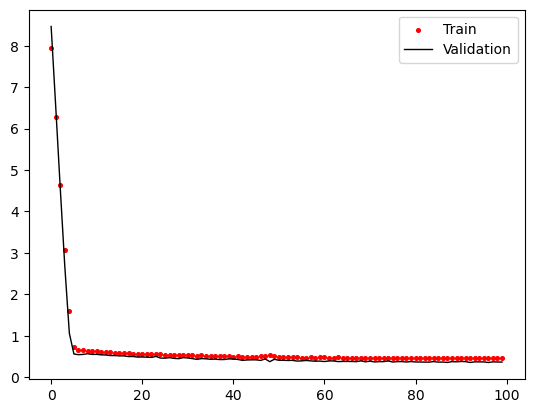

In [146]:
#Plot history
import matplotlib.pyplot as plt
train = hist.history['loss']
valid = hist.history['val_loss']
i = list(range(len(train)))
plt.scatter(x=i,y=train,marker='o',c='r',s=7)
plt.plot(i,valid,c='k',linewidth=1)
plt.legend(['Train','Validation'])